# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [44]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [47]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[ 0.  0. 10.  0.  0.  0.]


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

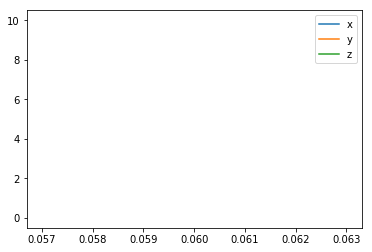

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

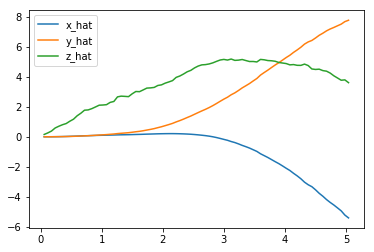

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

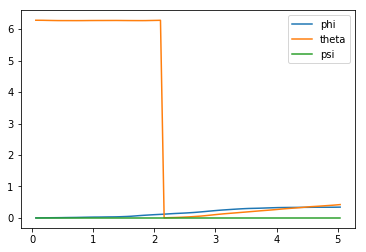

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

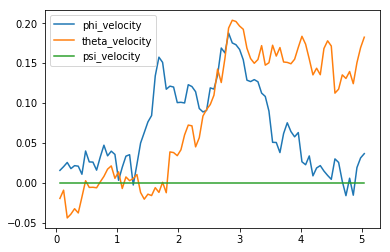

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

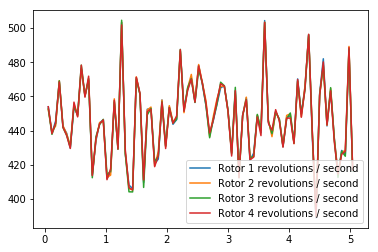

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-4.4800849  12.54109606 28.05277165  0.34305167  0.42368115  0.        ]
[-5.40217507  7.75705868  3.60140053]
[0.03656256 0.1825389  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.072 (best =   0.061), noise_scale = 3.2555

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [1]:
import sys
import pandas as pd
import csv
import numpy as np

from task import Task
from agent import DDPG

from keras import layers, models, optimizers
from keras import backend as K

import matplotlib.pyplot as plt


C:\Users\hartmans\Anaconda3\envs\udacity\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
def train(num_episodes):
        
    runtime = 5.                                     # time limit of the episode
    init_pose = np.array([0., 0., 4.0, 0., 0., 0.0])  # initial pose
    init_velocities = np.array([0., 0., 0.0])         # initial velocities
    init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
    file_output = 'rewards.txt'                         # file name for saved results

    
    target_pos = np.array([0., 0., 40.])
    task = Task(init_pose=init_pose,init_velocities=init_velocities, init_angle_velocities=init_angle_velocities, target_pos=target_pos)
    agent = DDPG(task) 

    labels = ['episod', 'avg_reward', 'total_reward']
    results = {x : [] for x in labels}

    with open(file_output, 'w') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(labels)  
        best_total_reward = -1000
        for i_episode in range(1, num_episodes+1):
            state = agent.reset_episode() # start a new episode
            total_reward = 0
            rewards = []          

            while True:
                
                # select action according to the learned policy and the exploration noise            
                action = agent.act(state) 
                # execute the action and observe the reward and the next state
                next_state, reward, done = task.step(action)                
                    
                # sample mini batch and learn
                agent.step(action, reward, next_state, done)

                # data tracking
                total_reward += reward
                rewards.append(reward)
                
                if total_reward > best_total_reward:
                    best_total_reward = total_reward

                state = next_state
                
                if done:                    
                    avg_reward = np.mean(np.array(rewards))
                    #print(task.sim.pose)
                    #to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
                    #for ii in range(len(labels)):
                    #    results[labels[ii]].append(to_write[ii])
                    #writer.writerow(to_write)
                    
                    to_write = [i_episode] + [avg_reward] + [total_reward]
                    for ii in range(len(labels)):
                        results[labels[ii]].append(to_write[ii])                    
                    print("\rEpisode = {:4d}, total_reward = {:7.3f}, avg_reward={:7.3} (best = {:7.3f})".format(
                        i_episode, total_reward, avg_reward, best_total_reward), end="")  # [debug]
                    break
            sys.stdout.flush()
            


    return agent, results

In [13]:
agent, results_train = train(num_episodes = 500)

[0. 0. 4. 0. 0. 0.]
Episode =  500, total_reward =  41.965, avg_reward=   1.17 (best =  96.598)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

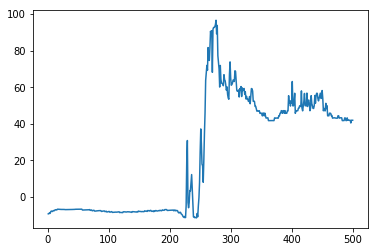

In [14]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results_train['episod'], results_train['total_reward'])
#plt.legend()
_ = plt.ylim()

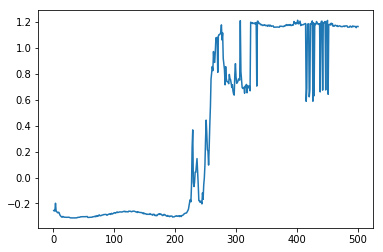

In [15]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results_train['episod'], results_train['avg_reward'])
#plt.legend()
_ = plt.ylim()

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
def test(agent, target_height):
    # perform simulation     
    #from task import Task
    
    fig, sub1 = plt.subplots(1, 1)
    sub2 = sub1.twinx()
    
    def plt_dynamic(x, y1, y2, color_y1 = 'g', color_y2 = 'b'):                
        sub1.plot(x, y1, color_y1)
        sub1.plot(x, y2, color_y2)        
        plt.show()       
        

    time_limit = 5
    y1_lower = 0
    y1_upper = 60
    y2_lower = 0
    y2_upper = 120

    sub1.set_xlim(0, time_limit)  # this is typically time
    sub1.set_ylim(y1_lower, y1_upper)  # limits to your y1
    sub2.set_xlim(0, time_limit)  # time, again
    sub2.set_ylim(y2_lower, y2_upper)  # limits to your y2

    # set labels and colors for the axes
    sub1.set_xlabel('time (s)', color='k')
    sub1.tick_params(axis='x', colors='k')

    sub1.set_ylabel('z-height', color='g')
    sub1.tick_params(axis='y', colors="g")

    sub2.set_ylabel('total reward', color='b')
    sub2.tick_params(axis='y', colors='b')

    display_graph = True
    display_freq = 1

    # Modify the values below to give the quadcopter a different starting position.
    runtime = 5.                                     # time limit of the episode
    init_pose = np.array([0., 0., 1., 0., 0., 0.])  # initial pose
    init_velocities = np.array([0., 0., 0.])         # initial velocities
    init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
    file_output = 'data_agent.txt'                         # file name for saved results

    # Setup
    task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
    agent.task = task

    done = False
    labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
            'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
            'psi_velocity', 'rotor_speed']
    results_test = {x : [] for x in labels}

    task.init_pose = init_pose
    task.target_pos = np.array([0., 0., target_height])

    # Run the simulation, and save the results.
    with open(file_output, 'w') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(labels)
        state = agent.reset_episode() # start a new episode    
        x, y1, y2 = [], [], []

        total_reward = 0
        while True:
            action = agent.act_no_noise(state) 
            next_state, reward, done = task.step(action)
            state = next_state 
            
            total_reward += reward
            
            x.append(task.sim.time)  # x: time
            y1.append(task.sim.pose[2])  # y1: z-height
            y2.append(total_reward)  # y2: total reward

            #print(reward)
            
            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
            for ii in range(len(labels)):
                results_test[labels[ii]].append(to_write[ii])
            writer.writerow(to_write)
            if done:
                print('done')
                print(task.sim.pose[:3])
                break        
        plt_dynamic(x, y1, y2)
    return results_test

[0. 0. 1. 0. 0. 0.]
done
[ 0.          0.         40.69000788]


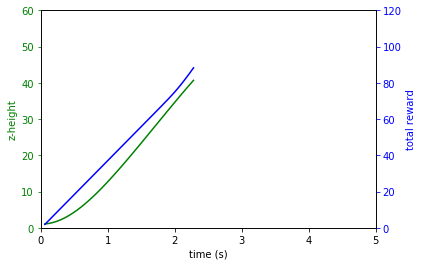

In [31]:
results_test = test(agent, target_height=40)

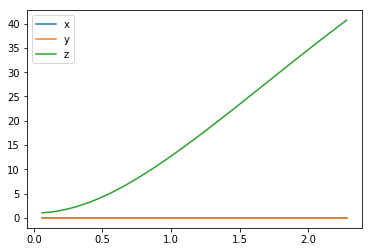

In [28]:


plt.plot(results_test['time'], results_test['x'], label='x')
plt.plot(results_test['time'], results_test['y'], label='y')
plt.plot(results_test['time'], results_test['z'], label='z')
plt.legend()
_ = plt.ylim()

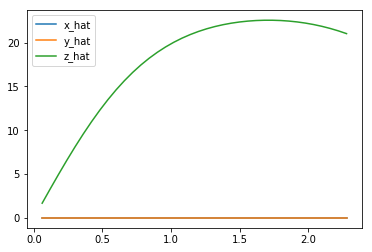

In [29]:
plt.plot(results_test['time'], results_test['x_velocity'], label='x_hat')
plt.plot(results_test['time'], results_test['y_velocity'], label='y_hat')
plt.plot(results_test['time'], results_test['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

[0. 0. 1. 0. 0. 0.]
done
[ 0.         0.        63.7416655]


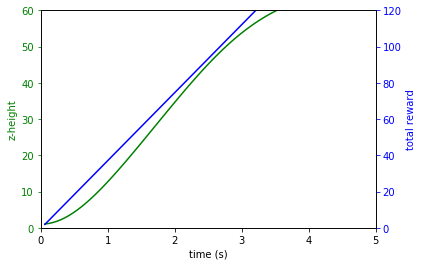

In [42]:
results_test = test(agent, target_height=70)

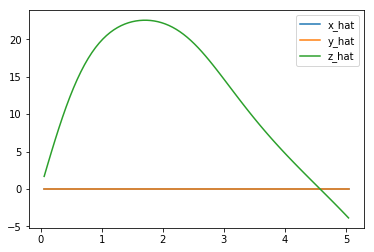

In [43]:
plt.plot(results_test['time'], results_test['x_velocity'], label='x_hat')
plt.plot(results_test['time'], results_test['y_velocity'], label='y_hat')
plt.plot(results_test['time'], results_test['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: I defined a vertical take-off task using only a single value to steer the motor speed. The reward function consists of two terms. One term encourages the agent to have a positive velocity that is the value of sim.v[2] squashed by a tanh function. The second term encourages the agent to fly towards a specified target height. This reward term is inspired by a Gaussian function with a large sigma and no amplitude factor. If the agent crashes the reward will be penalized by a small negative constant (-0.2), and if the agent reaches the target height a small constant of positive reward will be added.


**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: I tried the provided DDPG agent. I adapted the architecture to use batch normalization, kernel initializers. For all layers I use relu activations. The actor network consists of three layers with a different number of units (32, 64, 128) and uses the sigmoid function as activation. The critic network uses three layers for each, the states and the actions using a different number of units (32, 64, 64) in each branch. After fusing the branches, I added a layer with 128 units for aggregation the results of the two branches. I used 0.001 for the critic, and 0.0001 for the actor as learning rates and gamma was 0.99. During the training, the agent reached the target position that was located several meters above the ground several times. 

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: During the first experiments, I tried to use for independent motor speeds. However, the algorithm failed to successfully take-off. Then I modified the networks only to learn a single motor speed and use it for the take-off task. I think the reduced complexity made it the training much more stable. I ran the experiment multiple times. The agent behaves similarily over multiple runs. First, it crashes due to low velocity. Thus it hits the ground very early. After about 200 episodes it starts to understand how to achieve a high reward without crashing to the ground. Over time the agent reaches a reward level where the target high is achieved nearly after each episode. The understanding does not increase gradually over time, but there are some aha moments between episode 200 and 300. The low reward over that last 50 episodes is nearly constant at a value of 1.2. In the test shown above the agents manages to reach the target height of 40 meters. It fails to reach a target height of 70 meters because the z-velocity is decreased after about 2 seconds.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: In the beginning, I was a little bit lost. Then I read the paper describing the DDPG agent and started to add the modifications (batchnormalization, kernel initializers, different units.) to the network architecture that should increase the stability of the training procedure. After having started with 4 independent motor speed at first, I tried to reduce the complexity to a single motor speed to evaluate different reward function. For the take-off task, it seems to be essential to integrate the velocity into the reward function supported the by term to get the additional reward for reaching the target height.  The most challenging part was/still is designing an appropriate reward function. The agent currently behaves as expected and learns the task within the first 500 episodes. The skeleton with the sample code helped a lot to get started. 

Reinforcement learning was utterly new to me in contrast to the other topics of the nanodegree such as CNNs, RNNs, or GANs. However, the material helped a lot to get started with the topic. Although I simplified the task above to train the agent, it was much fun working on the project. I am now a point where I have a certain amount of knowledge and start to experiment with other types of tasks. Thanks go to the Udacity team for providing this excellent learning material. 